## Import Libraries

In [1]:
import pandas as pd
import numpy as np

## Read Data

In [2]:
df = pd.read_csv('2_year_dataset.csv')
df.head()

,id,bin_0,bin_3,nom_0,target
0,0,0,Y,Green,0
1,1,0,Y,Green,0
2,2,0,Y,Blue,0
3,3,0,Y,Red,1
4,4,0,N,Red,0


In [3]:
df.describe()

,id,bin_0,target
count,300000.000000,300000.000000,300000.00000
mean,149999.500000,0.127503,0.30588
std,86602.684716,0.333537,0.46078
min,0.000000,0.000000,0.00000
25%,74999.750000,0.000000,0.00000
50%,149999.500000,0.000000,0.00000
75%,224999.250000,0.000000,1.00000
max,299999.000000,1.000000,1.00000


In [4]:
df.shape

(300000, 5)

In [5]:
df.isnull().sum()

id        0
bin_0     0
bin_3     0
nom_0     0
target    0
dtype: int64

## Converting Categorical Features 

In [6]:
#using Dummies as LabelEncoder
df['bin_3'] = pd.get_dummies(df['bin_3'],drop_first=True)
#Using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['nom_0']=encoder.fit_transform(df['nom_0'])

In [7]:
print(df.head())
print(df.columns)

   id  bin_0  bin_3  nom_0  target
0   0      0      1      1       0
1   1      0      1      1       0
2   2      0      1      0       0
3   3      0      1      2       1
4   4      0      0      2       0
Index(['id', 'bin_0', 'bin_3', 'nom_0', 'target'], dtype='object')


# Logistic Regression model

## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x=df[['bin_0',  'bin_3', 'nom_0']]
y=df['target']
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=1)

## Training and Predicting

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
logmodel = LogisticRegression()
logmodel.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
lg_pred = logmodel.predict(xtest)

## Model Evaluation

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
print(accuracy_score(ytest,lg_pred))

0.6941666666666667


# KNN Classification

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [17]:
knn.fit(xtrain,ytrain)
knnpred = knn.predict(xtest)

In [18]:
print("Accuracy=",accuracy_score(ytest,knnpred))

Accuracy= 0.5869222222222222


## Choosing a K value

In [20]:
error_rate = []

for i in range(1,15):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    knnpred= knn.predict(xtest)
    error_rate.append(np.mean(knnpred != ytest))
    

Text(0, 0.5, 'Error Rate')

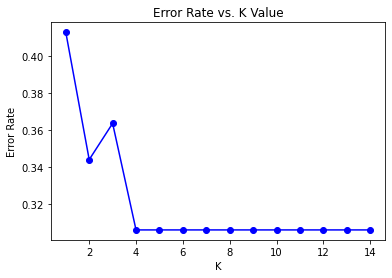

In [22]:
import matplotlib.pyplot as plt
plt.plot(range(1,15),error_rate,color='blue',marker="o")
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [23]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(xtrain,ytrain)
knnpred = knn.predict(xtest)
print("Accuracy=",accuracy_score(ytest,knnpred))

Accuracy= 0.6941666666666667


# Save the model

In [15]:
import pickle

In [16]:
regressor = LogisticRegression()
#Fitting model with training data
regressor.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
pickle.dump(regressor, open('model.pkl','wb'))

# Load the model

In [18]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[0,1,1]]))

[0]
